In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from warnings import simplefilter
simplefilter(action = 'ignore', category=FutureWarning)

In [85]:
hw_x = pd.read_csv('HW_X_nor.csv')
hw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']
X = np.array(hw_x)
# X = np.array(hw_x[['displacement', 'ncv_nca_max', 'nvv', 'energy_y', 'jerk']])
y = np.array(pd.read_csv('HW_y_nor.csv')).reshape(-1)

In [63]:
pahaw_x = pd.read_csv('PaHaW_X_nor.csv')
pahaw_x.columns = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']
# X = np.array(pahaw_x)
# X = np.array(pahaw_x[['0''1','2', '4']])
X = np.array(pahaw_x[['jerk_x', 'pressure_iqr', 'grip_iqr', 'ncv_max_y']])
y = np.array(pd.read_csv('PaHaW_y_nor.csv')).reshape(-1)

In [21]:
X.shape

(72, 5)

In [86]:
#exhaustive feature selection
feature_names = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'grip_iqr', 'mv', 'width', 'height', 'displacement', 'energy_x', 'energy_y', 'label']
# feature_names = ["nvv_x", "nvv_y", "nvv", "npv", "jerk_x", "jerk_y", "jerk", "nca_max_x", "nca_max_y", "nca_min_x", "nca_min_y", "nca_max", "nca_min", "ncv_max_x", "ncv_max_y", "ncv_min_x", "ncv_min_y", "ncv_max", "ncv_min", "ncv_nca_max_x", "ncv_nca_max_y", "ncv_nca_min_x", "ncv_nca_min_y", "ncv_nca_max", "ncv_nca_min", "ncp_max", "ncp_min", "std_pre", 'std_grip', 'mean_grip', "duration", 'entropy_S', 'pressure_iqr', 'mv', 'sdv']

lr = LogisticRegression()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
clf = SVC(gamma='auto')

efs1 = EFS(lr, 
           min_features=1,
           max_features=1,
           scoring='accuracy',
           print_progress=True,
           cv=10)

efs1 = efs1.fit(X, y, custom_feature_names=feature_names)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)

Features: 41/41

Best accuracy score: 0.84
Best subset (indices): (4,)
Best subset (corresponding names): ('jerk_x',)


In [87]:
df = pd.DataFrame.from_dict(efs1.get_metric_dict()).T
df.sort_values('avg_score', inplace=True, ascending=False)
df

,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
4,0.839881,0.0801503,"[0.875, 0.625, 0.75, 0.875, 0.75, 0.8571428571...","(4,)","(jerk_x,)",0.107916,0.0359718
23,0.831548,0.176505,"[0.75, 1.0, 1.0, 0.875, 1.0, 0.857142857142857...","(23,)","(ncv_nca_max,)",0.237649,0.0792164
6,0.82381,0.0841647,"[1.0, 0.75, 0.875, 0.625, 0.75, 0.714285714285...","(6,)","(jerk,)",0.113321,0.0377735
11,0.814881,0.109572,"[0.75, 0.875, 0.875, 0.5, 0.625, 1.0, 0.857142...","(11,)","(nca_max,)",0.147529,0.0491763
12,0.814881,0.101401,"[0.625, 0.875, 0.875, 0.625, 0.625, 1.0, 0.857...","(12,)","(nca_min,)",0.136528,0.0455092
35,0.81131,0.0921641,"[0.625, 0.75, 0.875, 0.75, 0.875, 0.8571428571...","(35,)","(width,)",0.124091,0.0413637
5,0.81131,0.0845782,"[0.75, 0.75, 0.75, 1.0, 0.625, 0.7142857142857...","(5,)","(jerk_y,)",0.113877,0.0379591
22,0.802381,0.109328,"[0.875, 0.75, 0.625, 0.75, 1.0, 1.0, 0.8571428...","(22,)","(ncv_nca_min_y,)",0.147201,0.0490669
19,0.796429,0.123133,"[0.625, 0.875, 0.75, 1.0, 1.0, 1.0, 0.71428571...","(19,)","(ncv_nca_max_x,)",0.165789,0.0552628
40,0.796429,0.035023,"[0.75, 0.75, 0.75, 0.75, 0.75, 0.8571428571428...","(40,)","(label,)",0.0471555,0.0157185


In [43]:
pd.DataFrame(df).to_csv('both_KNN_features.csv', index=False)

C:\Users\irene\Anaconda3\lib\site-packages\matplotlib\collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


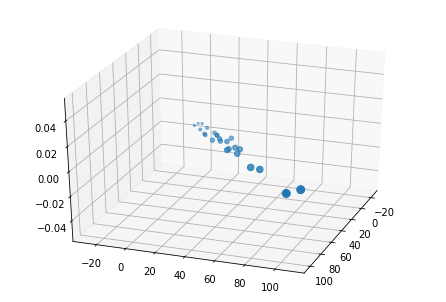

In [83]:
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
plt.scatter(X[:, 0], X[:, 1], X[:, 2],marker='o')

In [20]:
pca = PCA(n_components=2, svd_solver='full')
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.read_csv('HW_y_nor.csv')], axis = 1)

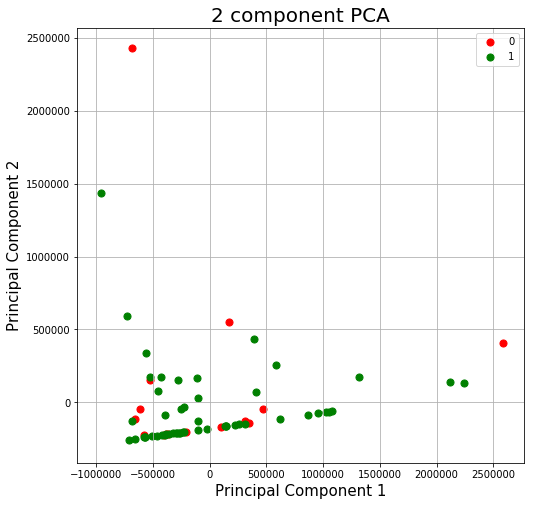

In [86]:
col = ['principal component 1', 'principal component 2', 'target']
finalDf.columns = col

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Text(0.5, 1.0, 'ParkinsonHW')

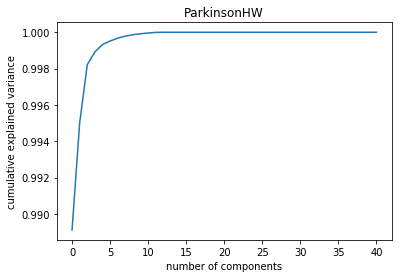

In [74]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('ParkinsonHW')

In [64]:
pca = PCA(n_components=3)
pca.fit(X)
print(pca.explained_variance_ratio_) 
print(pca.singular_values_) 

[0.73136353 0.23431435 0.03386698]
[5824369.8402361  3296717.54226999 1253344.73239482]


In [69]:
pca = PCA(.99)

In [26]:
##LR 10-FOLD
kf = KFold(n_splits=10, shuffle=True)

logisticRegr = LogisticRegression()

acc = []
pre = []
rec = []

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#     pca.fit(X_train)
#     X_train = pca.transform(X_train)
#     X_test = pca.transform(X_test)
    
    logisticRegr.fit(X_train, y_train)
    pred = logisticRegr.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))

print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

0.6119047619047618
0.5583333333333333
0.4916666666666667


In [71]:
##KNN 10-FOLD
kf = KFold(n_splits=10, shuffle=True)

knn = KNeighborsClassifier(n_neighbors=3)

acc = []
pre = []
rec = []

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
#     pca.fit(X_train)
#     X_train = pca.transform(X_train)
#     X_test = pca.transform(X_test)
    
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))

print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

0.6214285714285713
0.655
0.5966666666666666


In [83]:
##Decision Tree 10-FOLD
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

kf = KFold(n_splits=10, shuffle=True)

acc = []
pre = []
rec = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#     pca.fit(X_train)
#     X_train = pca.transform(X_train)
#     X_test = pca.transform(X_test)
    
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))

print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

0.8607142857142858
0.9690476190476189
0.8575000000000002


In [77]:
##Naive Bayes 10-FOLD
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10, shuffle=True)

acc = []
pre = []
rec = []

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))

print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

0.9160714285714286
0.9433333333333334
0.944047619047619


In [81]:
##Random Forest 10-FOLD
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

kf = KFold(n_splits=10, shuffle=True)

acc = []
pre = []
rec = []

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    
    acc.append(accuracy_score(y_test, pred))
    pre.append(precision_score(y_test, pred))
    rec.append(recall_score(y_test, pred))

print(np.mean(acc))
print(np.mean(pre))
print(np.mean(rec))

0.8910714285714286
0.8827380952380952
1.0
